# Task 1

---

## Web scraping and analysis

This Jupyter notebook includes some code to get you started with web scraping. We will use a package called `BeautifulSoup` to collect the data from the web. Once you've collected your data and saved it into a local `.csv` file you should start with your analysis.

### Scraping data from Skytrax

If you visit [https://www.airlinequality.com] you can see that there is a lot of data there. For this task, we are only interested in reviews related to British Airways and the Airline itself.

If you navigate to this link: [https://www.airlinequality.com/airline-reviews/british-airways] you will see this data. Now, we can use `Python` and `BeautifulSoup` to collect all the links to the reviews and then to collect the text data on each of the individual review links.

In [ ]:
import requests
from bs4 import BeautifulSoup
import pandas as pd
import re

In [ ]:
base_url = "https://www.airlinequality.com/airline-reviews/british-airways"
pages = 30
page_size = 100

reviews = []

# for i in range(1, pages + 1):
for i in range(1, pages + 1):

    print(f"Scraping page {i}")

    # Create URL to collect links from paginated data
    url = f"{base_url}/page/{i}/?sortby=post_date%3ADesc&pagesize={page_size}"

    # Collect HTML data from this page
    response = requests.get(url)

    # Parse content
    content = response.content
    parsed_content = BeautifulSoup(content, 'html.parser')
    for para in parsed_content.find_all("div", {"class": "text_content"}):
        reviews.append(para.get_text())
    
    print(f"   ---> {len(reviews)} total reviews")

In [ ]:
pd.set_option("display.max_rows", None, "display.max_columns", None)

In [ ]:
df = pd.DataFrame()
df["reviews"] = reviews
df.head()

In [ ]:
df.shape

(3000, 1)

# MY WORK

## DATA SCRAPING

In [ ]:
from bs4 import BeautifulSoup
import pandas as pd
import numpy as np
import requests as rq

import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
global rating, Aircraft, Class, Travel_type, Route, Date, comfort, staff, food, entertainment, wifi, ground_service, vfm, recommend

verified=[]
rating=[]
feedback=[]
Aircraft=[]
Class=[]
Travel_type=[]
Route=[]
Date=[]
comfort=[]
staff=[]
food=[]
entertainment=[]
wifi=[]
ground_service=[]
vfm=[]
recommend=[]

In [ ]:
def value_fetcher(soup):
    rating.append(np.nan)
    Aircraft.append(np.nan)
    Class.append(np.nan)
    Travel_type.append(np.nan)
    Route.append(np.nan)
    Date.append(np.nan)
    comfort.append(np.nan)
    staff.append(np.nan)
    food.append(np.nan)
    entertainment.append(np.nan)
    wifi.append(np.nan)
    ground_service.append(np.nan)
    vfm.append(np.nan)
    recommend.append(np.nan)
    
    for row in soup.find_all('tr'):
        header=row.find('td',class_='review-rating-header').text
        value=row.find('td',class_='review-value')
        if header=='Aircraft':
            Aircraft[-1]=value.text
        elif header=='Type Of Traveller':
            Travel_type[-1]=value.text
        elif header=='Seat Type':
            Class[-1]=value.text
        elif header=='Route':
            Route[-1]=value.text
        elif header=='Date Flown':
            Date[-1]=value.text
        elif header=='Seat Comfort':
            comfort[-1]=len(row.find_all('span',class_='star fill'))
        elif header=='Cabin Staff Service':
            staff[-1]=len(row.find_all('span',class_='star fill'))
        elif header=='Food & Beverages':
            food[-1]=len(row.find_all('span',class_='star fill'))
        elif header=='Inflight Entertainment':
            entertainment[-1]=len(row.find_all('span',class_='star fill'))
        elif header=='Ground Service':
            ground_service[-1]=len(row.find_all('span',class_='star fill'))
        elif header=='Value For Money':
            vfm[-1]=len(row.find_all('span',class_='star fill'))
        elif header=='Recommended':
            recommend[-1]=value.text
        elif header=='Wifi & Connectivity':
            wifi[-1]=len(row.find_all('span',class_='star fill'))

In [ ]:
def fetcher(soup,tag,key,value):
    if soup.find(tag,{key:value}):
        return soup.find(tag,{key:value}).text
    return np.nan

In [ ]:
for i in range(1,344):
    url=f'https://www.airlinequality.com/airline-reviews/british-airways/page/{i}/'
    page=rq.get(url).text
    soup=BeautifulSoup(page,'lxml')
    articles= soup.find_all('article',{'itemprop':'review'})
    for article in articles:
        rating.append(fetcher(article,'span','itemprop','ratingValue'))
        div=article.find('div',class_='tc_mobile')
        content=(div.find('div',class_='text_content').text.split('|'))
        if len(content)==2:
            verification,review=content
        else:
            verification =np.nan
            review=content[0]
        verified.append(verification)
        feedback.append(review)
        table=div.find('table',class_='review-ratings')
        value_fetcher(table)

In [ ]:
data=pd.DataFrame({'status':verified,'aircraft':Aircraft,'travel_type':Travel_type,'travel_class':Class,'route':Route,'date':Date,'seating_comfort':comfort,'staff_service':staff,'food_quality':food,'entertainment':entertainment,'wifi':wifi,'ground_service':ground_service,'value_for_money':vfm,'recommended':recommend,'overall_rating':rating[::2],'review':feedback})

In [ ]:
data.to_csv('/content/data/BA_reviews.csv',index=False)

## DATA ANALYSIS

In [ ]:
import pandas as pd
import numpy as np
import requests as rq

import plotly.express as px
import matplotlib.pyplot as plt
from matplotlib import rc
import seaborn as sns

In [ ]:
data = pd.read_csv('/content/BA_reviews.csv')

In [ ]:
data.head(5)

,status,aircraft,travel_type,travel_class,route,date,seating_comfort,staff_service,food_quality,entertainment,wifi,ground_service,value_for_money,recommended,overall_rating,review
0,✅ Trip Verified,Boeing 777-200,Family Leisure,Economy Class,Atlanta to London,January 2023,1.0,1.0,1.0,3.0,NaN,1.0,2,no,4.0,Flew ATL to LHR 8th Jan 2023. Was unlucky en...
1,Not Verified,A380,Family Leisure,Economy Class,London to Chicago,December 2022,3.0,2.0,3.0,4.0,NaN,3.0,2,no,5.0,Great thing about British Airways A380 is th...
2,Not Verified,NaN,Family Leisure,Economy Class,Istanbul to Vancouver via Heathrow,January 2023,1.0,5.0,1.0,1.0,NaN,1.0,1,no,1.0,"The staff are friendly. The plane was cold, w..."
3,✅ Trip Verified,"A320, A380",Family Leisure,Business Class,Vienna to Los Angeles via London Heathrow,January 2023,1.0,2.0,1.0,1.0,1.0,1.0,1,no,1.0,Probably the worst business class experience ...
4,✅ Trip Verified,NaN,Business,Business Class,London to San francisco,January 2023,2.0,5.0,2.0,1.0,1.0,2.0,1,no,2.0,"Definitely not recommended, especially for bu..."


In [ ]:
# convert all numerical features to int

data['overall_rating'] = data['overall_rating'].astype('Int64')
data['seating_comfort'] = data['seating_comfort'].astype('Int64')
data['staff_service'] = data['staff_service'].astype('Int64')
data['food_quality'] = data['food_quality'].astype('Int64')
data['entertainment'] = data['entertainment'].astype('Int64')
data['wifi'] = data['wifi'].astype('Int64')
data['ground_service'] = data['ground_service'].astype('Int64')
data['value_for_money'] = data['value_for_money'].astype('Int64')

In [ ]:
data.head(5)

,status,aircraft,travel_type,travel_class,route,date,seating_comfort,staff_service,food_quality,entertainment,wifi,ground_service,value_for_money,recommended,overall_rating,review
0,✅ Trip Verified,Boeing 777-200,Family Leisure,Economy Class,Atlanta to London,January 2023,1,1,1,3,<NA>,1,2,no,4,Flew ATL to LHR 8th Jan 2023. Was unlucky en...
1,Not Verified,A380,Family Leisure,Economy Class,London to Chicago,December 2022,3,2,3,4,<NA>,3,2,no,5,Great thing about British Airways A380 is th...
2,Not Verified,NaN,Family Leisure,Economy Class,Istanbul to Vancouver via Heathrow,January 2023,1,5,1,1,<NA>,1,1,no,1,"The staff are friendly. The plane was cold, w..."
3,✅ Trip Verified,"A320, A380",Family Leisure,Business Class,Vienna to Los Angeles via London Heathrow,January 2023,1,2,1,1,1,1,1,no,1,Probably the worst business class experience ...
4,✅ Trip Verified,NaN,Business,Business Class,London to San francisco,January 2023,2,5,2,1,1,2,1,no,2,"Definitely not recommended, especially for bu..."


In [ ]:
data.shape

(3430, 16)

the main goal of this notbook is to find what is not working well and needs immidiate change for the BA customers and highlight it.(rating =< 4)

we also going to highlight what is going very well (rating >= 8)

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3430 entries, 0 to 3429
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   status           1931 non-null   object
 1   aircraft         1807 non-null   object
 2   travel_type      2684 non-null   object
 3   travel_class     3428 non-null   object
 4   route            2680 non-null   object
 5   date             2676 non-null   object
 6   seating_comfort  3332 non-null   Int64 
 7   staff_service    3324 non-null   Int64 
 8   food_quality     3097 non-null   Int64 
 9   entertainment    2408 non-null   Int64 
 10  wifi             511 non-null    Int64 
 11  ground_service   2617 non-null   Int64 
 12  value_for_money  3430 non-null   Int64 
 13  recommended      3430 non-null   object
 14  overall_rating   3424 non-null   Int64 
 15  review           3430 non-null   object
dtypes: Int64(8), object(8)
memory usage: 455.7+ KB


In [ ]:
data['overall_rating'].value_counts(dropna=False)

1      747
2      388
3      375
8      358
10     315
7      304
9      298
4      232
5      221
6      186
NaN      6
Name: overall_rating, dtype: Int64

In [ ]:
# we have 6 NAN values in the overall_rating column and we made the decision to drop them.
data = data[data['overall_rating'].notna()]

In [ ]:
# Checking percentages after removing the Nan values
data['overall_rating'].value_counts(normalize=True)*100

1     21.816589
2     11.331776
3     10.952103
8     10.455607
10     9.199766
7      8.878505
9      8.703271
4      6.775701
5      6.454439
6      5.432243
Name: overall_rating, dtype: Float64

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


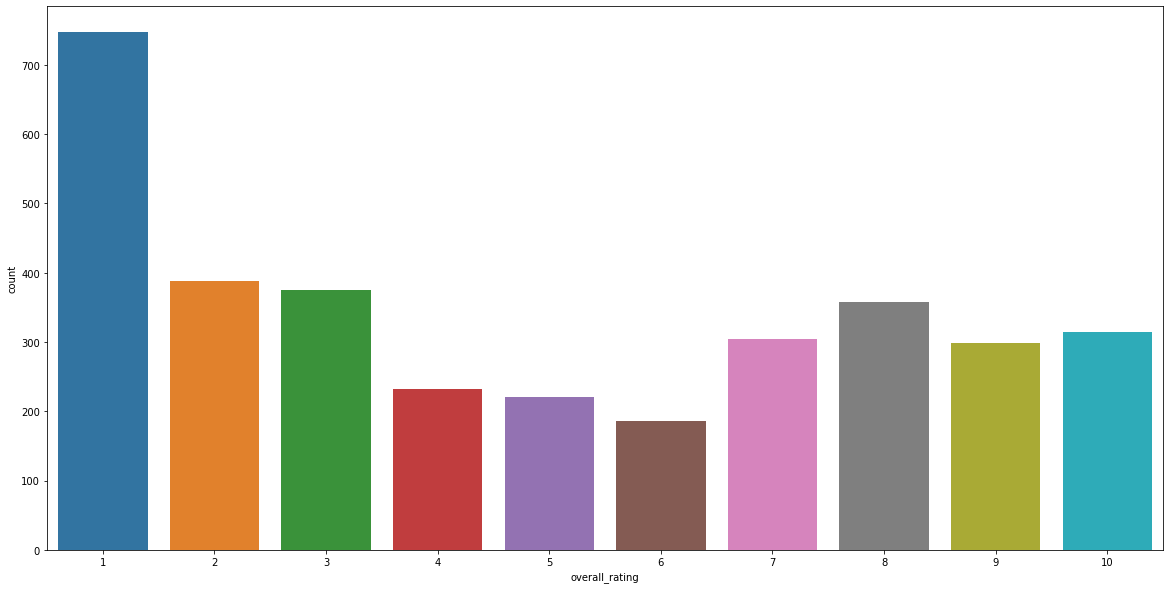

In [ ]:
plt.figure(figsize=(20,10))
sns.countplot(data['overall_rating'])
plt.show()

feature eng: creating a new categorical column that represents the ratings better:

we will drop the Nan.

[1-4] : bad

[5-7] : average

[8-10] : good

later when we go deeper, we will add the poor and the excellent groups.

In [ ]:
data['rating'] = 'bad'
data.loc[(data['overall_rating'] > 4) & (data['overall_rating'] <= 7), 'rating'] = 'average'
data.loc[(data['overall_rating'] > 7) & (data['overall_rating'] <= 10), 'rating'] = 'good'


In [ ]:
data.head()

,status,aircraft,travel_type,travel_class,route,date,seating_comfort,staff_service,food_quality,entertainment,wifi,ground_service,value_for_money,recommended,overall_rating,review,rating
0,✅ Trip Verified,Boeing 777-200,Family Leisure,Economy Class,Atlanta to London,January 2023,1,1,1,3,<NA>,1,2,no,4,Flew ATL to LHR 8th Jan 2023. Was unlucky en...,bad
1,Not Verified,A380,Family Leisure,Economy Class,London to Chicago,December 2022,3,2,3,4,<NA>,3,2,no,5,Great thing about British Airways A380 is th...,average
2,Not Verified,NaN,Family Leisure,Economy Class,Istanbul to Vancouver via Heathrow,January 2023,1,5,1,1,<NA>,1,1,no,1,"The staff are friendly. The plane was cold, w...",bad
3,✅ Trip Verified,"A320, A380",Family Leisure,Business Class,Vienna to Los Angeles via London Heathrow,January 2023,1,2,1,1,1,1,1,no,1,Probably the worst business class experience ...,bad
4,✅ Trip Verified,NaN,Business,Business Class,London to San francisco,January 2023,2,5,2,1,1,2,1,no,2,"Definitely not recommended, especially for bu...",bad


In [ ]:
data.rating.value_counts()

bad        1742
good        971
average     711
Name: rating, dtype: int64

In [ ]:
df_overall_rating = data['rating'].value_counts().to_frame()
df_overall_rating= df_overall_rating.sort_index()
df_overall_rating

,rating
average,711
bad,1742
good,971


In [ ]:
fig = px.pie(df_overall_rating, values='rating', names=df_overall_rating.index, color_discrete_sequence=px.colors.sequential.Agsunset_r)
fig.show()

In [ ]:
print(data.rating.value_counts(normalize=True)*100)

bad        50.876168
good       28.358645
average    20.765187
Name: rating, dtype: float64


In [ ]:
data.recommended.value_counts(normalize=True)*100

no     57.856308
yes    42.143692
Name: recommended, dtype: float64

### first finding:

The number of bad reviews with a **(rating <= 4)** rpresents more than 50%. (50.88%) of the dataset!

BASED ON THEIR REVIEWS, MORE THAN HALF OF THE CUSTOMERS IN HANDS ARE NOT SATISFIED AT ALL!

And 57% of the customers would not recommend Britsh Airways!

**This call for change!**

## FOCUSING ON THE UNSATISFIED CUSTOMERS! what shoud we change?

1.   Exploring their travel classs
2.   Exploring their travel periodes
3.   Exploring their travel routes
4.   Maybe it's the aircraft ?



#### FINDINGS:
1. majority of the unsatisfied reviews are from the Economy class 988 reviews representing 56% of the bad reviews. 

### 1.   Exploring their travel classs

In [ ]:
# first and before we start analysing results let's see if the "Trave_class" feature is balanced or not.
data.travel_class.value_counts(normalize=True)*100

Economy Class      51.198130
Business Class     33.080070
Premium Economy     9.877265
First Class         5.844535
Name: travel_class, dtype: float64

In [ ]:
# let's dive deeper and explore what type of travel_class are these unsatisfied customers book the most.
bad_review_data = data[data['rating'] == "bad"]

In [ ]:
bad_review_data.travel_class.value_counts()

Economy Class      988
Business Class     509
Premium Economy    164
First Class         79
Name: travel_class, dtype: int64

In [ ]:
bad_review_data.travel_class.value_counts(normalize=True)

Economy Class      0.567816
Business Class     0.292529
Premium Economy    0.094253
First Class        0.045402
Name: travel_class, dtype: float64

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



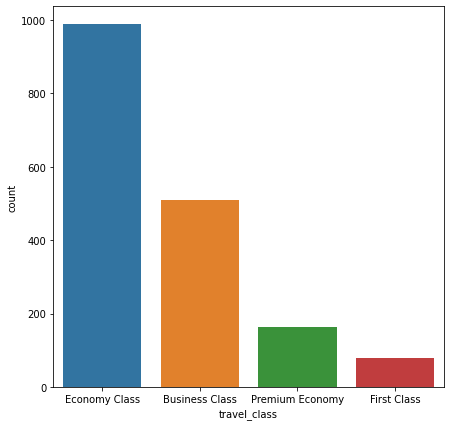

In [ ]:
plt.figure(figsize=(7,7))
sns.countplot(bad_review_data['travel_class'])

This is not very representative! the economy class has the majority of the reviews. so lets se the percentage in the lass it self.

In [ ]:
#Exploring the the percentage of unsatisfied customers by travel_class:

Economy_Class_p= (988/1752)*100
Business_Class_p= (509/1132)*100
Premium_Economy_p= (164/338)*100
First_Class_p= (79/200)*100

print("%.2f" % Economy_Class_p ,'% of the Total Economy Class customers are unsatisfied')
print("%.2f" % Business_Class_p ,'% of the Total Business Class customers are unsatisfied')
print("%.2f" % Premium_Economy_p ,'% of the Total Premium Economy customers are unsatisfied')
print("%.2f" % First_Class_p ,'% of the Total First Class customers are unsatisfied')

56.39 % of the Total Economy Class customers are unsatisfied
44.96 % of the Total Business Class customers are unsatisfied
48.52 % of the Total Premium Economy customers are unsatisfied
39.50 % of the Total First Class customers are unsatisfied


### second finding:

the economy class customers tend to give bad reviews than other customers.

56.39 % of the Total Economy Class customers are unsatisfied.

in the other hand only 39.50 % of the Total First Class customers are unsatisfied.

### 2. Exploring their travel periodes

In [ ]:
len(data.date.value_counts())

102

**Our reviews are separated on 102 different dates, in order to have a better understanding of the data, we will groupe them by the months:**



In [ ]:
# change the the format to date-time
data['date'] = pd.to_datetime(data['date'])

In [ ]:
# adding a new column to the main dataframe
data['month'] = pd.DatetimeIndex(data['date']).month
data['year'] = pd.DatetimeIndex(data['date']).year

data['month'] = data['month'].astype('Int64')
data['year'] = data['year'].astype('Int64')

data.head()

,status,aircraft,travel_type,travel_class,route,date,seating_comfort,staff_service,food_quality,entertainment,wifi,ground_service,value_for_money,recommended,overall_rating,review,rating,month,year
0,✅ Trip Verified,Boeing 777-200,Family Leisure,Economy Class,Atlanta to London,2023-01-01,1,1,1,3,<NA>,1,2,no,4,Flew ATL to LHR 8th Jan 2023. Was unlucky en...,bad,1,2023
1,Not Verified,A380,Family Leisure,Economy Class,London to Chicago,2022-12-01,3,2,3,4,<NA>,3,2,no,5,Great thing about British Airways A380 is th...,average,12,2022
2,Not Verified,NaN,Family Leisure,Economy Class,Istanbul to Vancouver via Heathrow,2023-01-01,1,5,1,1,<NA>,1,1,no,1,"The staff are friendly. The plane was cold, w...",bad,1,2023
3,✅ Trip Verified,"A320, A380",Family Leisure,Business Class,Vienna to Los Angeles via London Heathrow,2023-01-01,1,2,1,1,1,1,1,no,1,Probably the worst business class experience ...,bad,1,2023
4,✅ Trip Verified,NaN,Business,Business Class,London to San francisco,2023-01-01,2,5,2,1,1,2,1,no,2,"Definitely not recommended, especially for bu...",bad,1,2023


In [ ]:
# create a new dataframe for all customers by date and then we drop Nan Value and we convert each month by name using calendar library
import calendar

data_date = data
data_date = data_date.dropna(subset=['month'])

data_date['month'] = data_date['month'].apply(lambda x: calendar.month_abbr[x])
data_date.head()

<ipython-input-30-76af86ade9a0>:7: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



,status,aircraft,travel_type,travel_class,route,date,seating_comfort,staff_service,food_quality,entertainment,wifi,ground_service,value_for_money,recommended,overall_rating,review,rating,month,year
0,✅ Trip Verified,Boeing 777-200,Family Leisure,Economy Class,Atlanta to London,2023-01-01,1,1,1,3,<NA>,1,2,no,4,Flew ATL to LHR 8th Jan 2023. Was unlucky en...,bad,Jan,2023
1,Not Verified,A380,Family Leisure,Economy Class,London to Chicago,2022-12-01,3,2,3,4,<NA>,3,2,no,5,Great thing about British Airways A380 is th...,average,Dec,2022
2,Not Verified,NaN,Family Leisure,Economy Class,Istanbul to Vancouver via Heathrow,2023-01-01,1,5,1,1,<NA>,1,1,no,1,"The staff are friendly. The plane was cold, w...",bad,Jan,2023
3,✅ Trip Verified,"A320, A380",Family Leisure,Business Class,Vienna to Los Angeles via London Heathrow,2023-01-01,1,2,1,1,1,1,1,no,1,Probably the worst business class experience ...,bad,Jan,2023
4,✅ Trip Verified,NaN,Business,Business Class,London to San francisco,2023-01-01,2,5,2,1,1,2,1,no,2,"Definitely not recommended, especially for bu...",bad,Jan,2023


In [ ]:
df = data_date
fig = px.histogram(df, x="month", color="overall_rating").update_xaxes(categoryorder='total descending')
fig.show()

### third finding

Users reviewed BA more during Sep, Oct, and Nov. Fourth quarter of the year

the majority of rating each months are: 1 (green), 2 (purple), and 3(hard_pink).

it dosen't matter which month the bad ratings represents the majority.

## Visualizing the rating percentage of each category (seating_comfort, staff_service, food_quality,entertainment, wifi, ground_service, value_for_money)after drop Nan values seperatly

### seating_comfort

In [ ]:
data.head(2)

,status,aircraft,travel_type,travel_class,route,date,seating_comfort,staff_service,food_quality,entertainment,wifi,ground_service,value_for_money,recommended,overall_rating,review,rating,month,year
0,✅ Trip Verified,Boeing 777-200,Family Leisure,Economy Class,Atlanta to London,2023-01-01,1,1,1,3,<NA>,1,2,no,4,Flew ATL to LHR 8th Jan 2023. Was unlucky en...,bad,1,2023
1,Not Verified,A380,Family Leisure,Economy Class,London to Chicago,2022-12-01,3,2,3,4,<NA>,3,2,no,5,Great thing about British Airways A380 is th...,average,12,2022


In [ ]:
data_seating_comfort = data[['seating_comfort', 'rating']].copy()

In [ ]:
data_seating_comfort.shape

(3424, 2)

In [ ]:
data_seating_comfort.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3424 entries, 0 to 3429
Data columns (total 2 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   seating_comfort  3326 non-null   Int64 
 1   rating           3424 non-null   object
dtypes: Int64(1), object(1)
memory usage: 212.6+ KB


In [ ]:
# we notice that we have more than 100 Nan values. we wil drop them.

data_seating_comfort.dropna(inplace=True)

In [ ]:
data_seating_comfort.seating_comfort.value_counts().sort_index()

1    738
2    556
3    787
4    767
5    478
Name: seating_comfort, dtype: Int64

In [ ]:
seating_comfort_list = data_seating_comfort.seating_comfort.value_counts().sort_index().tolist()

In [ ]:
seating_comfort_list

[738, 556, 787, 767, 478]

### staff_service

In [ ]:
staff_service_data = data[['staff_service']].copy()

In [ ]:
staff_service_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3424 entries, 0 to 3429
Data columns (total 1 columns):
 #   Column         Non-Null Count  Dtype
---  ------         --------------  -----
 0   staff_service  3318 non-null   Int64
dtypes: Int64(1)
memory usage: 185.9 KB


In [ ]:
staff_service_data.dropna(inplace=True)

In [ ]:
staff_service_list = staff_service_data.staff_service.value_counts().sort_index().tolist()

In [ ]:
staff_service_list

[625, 467, 551, 682, 993]

### food_quality

In [ ]:
food_quality_data = data[['food_quality', 'rating']].copy()

In [ ]:
food_quality_data.food_quality.value_counts()

1    900
4    627
3    570
2    533
5    459
0      2
Name: food_quality, dtype: Int64

In [ ]:
food_quality_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3424 entries, 0 to 3429
Data columns (total 2 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   food_quality  3091 non-null   Int64 
 1   rating        3424 non-null   object
dtypes: Int64(1), object(1)
memory usage: 212.6+ KB


In [ ]:
food_quality_data.dropna(inplace=True)

In [ ]:
food_quality_list = food_quality_data.food_quality.value_counts().sort_index().tolist()

In [ ]:
del food_quality_list[0]
food_quality_list

[900, 533, 570, 627, 459]

### entertainment

In [ ]:
entertainment_data = data[['entertainment', 'rating']].copy()

In [ ]:
entertainment_data.entertainment.value_counts()

1    722
3    511
4    441
2    421
5    301
0      6
Name: entertainment, dtype: Int64

In [ ]:
entertainment_data.dropna(inplace=True)

In [ ]:
entertainment_list = entertainment_data.entertainment.value_counts().sort_index().tolist()

In [ ]:
del entertainment_list[0]
entertainment_list


[722, 421, 511, 441, 301]

### wifi

In [ ]:
wifi_data = data[['wifi', 'rating']].copy()

In [ ]:
wifi_data.wifi.value_counts()

1    309
3     60
2     57
5     46
4     39
Name: wifi, dtype: Int64

In [ ]:
wifi_data.dropna(inplace=True)

In [ ]:
wifi_list = wifi_data.wifi.value_counts().sort_index().tolist()

In [ ]:
wifi_list

[309, 57, 60, 39, 46]

### ground_service

In [ ]:
ground_service_data = data[['ground_service', 'rating']].copy()

In [ ]:
ground_service_data.ground_service.value_counts()

1    744
4    597
3    535
5    404
2    337
Name: ground_service, dtype: Int64

In [ ]:
ground_service_data.dropna(inplace=True)

In [ ]:
ground_service_list = ground_service_data.ground_service.value_counts().sort_index().tolist()

In [ ]:
ground_service_list

[744, 337, 535, 597, 404]

### value_for_money

In [ ]:
value_for_money_data = data[['value_for_money', 'rating']].copy()

In [ ]:
value_for_money_data.value_for_money.value_counts()

1    1055
4     641
3     635
5     562
2     531
Name: value_for_money, dtype: Int64

In [ ]:
value_for_money_data.dropna(inplace=True)

In [ ]:
value_for_money_list = value_for_money_data.value_for_money.value_counts().sort_index().tolist()

In [ ]:
value_for_money_list

[1055, 531, 635, 641, 562]

### Time to visualize

In [ ]:
data.rating.value_counts()

bad        1742
good        971
average     711
Name: rating, dtype: int64

In [ ]:
data.columns

Index(['status', 'aircraft', 'travel_type', 'travel_class', 'route', 'date',
       'seating_comfort', 'staff_service', 'food_quality', 'entertainment',
       'wifi', 'ground_service', 'value_for_money', 'recommended',
       'overall_rating', 'review', 'rating', 'month', 'year'],
      dtype='object')

In [ ]:
seating_comfort_list

[738, 556, 787, 767, 478]

In [ ]:
staff_service_list

[625, 467, 551, 682, 993]

In [ ]:
food_quality_list

[900, 533, 570, 627, 459]

In [ ]:
entertainment_list

[722, 421, 511, 441, 301]

In [ ]:
wifi_list

[309, 57, 60, 39, 46]

In [ ]:
ground_service_list

[744, 337, 535, 597, 404]

In [ ]:
value_for_money_list

[1055, 531, 635, 641, 562]

In [ ]:
names = ['seating_comfort','staff_service','food_quality','entertainment','wifi','ground_service','value_for_money']

raw_data = {'one_star': [738,625,900,722,309,744,1055], 'two_stars': [556,467,533,421,57,337,531], 'three_stars': [787,551,570,511,60,535,635], 'four_stars': [767,682,627,441,39,597,641], 'five_stars': [478,993,459,301,46,404,562]}
df = pd.DataFrame(raw_data)

# From raw value to percentage
totals = [i+j+k+l+m for i,j,k,l,m in zip(df['one_star'], df['two_stars'], df['three_stars'], df['four_stars'], df['five_stars'])]

one_star_norm = [i / j * 100 for i,j in zip(df['one_star'], totals)]
two_stars_norm = [i / j * 100 for i,j in zip(df['two_stars'], totals)]
three_stars_norm = [i / j * 100 for i,j in zip(df['three_stars'], totals)]
four_stars_norm = [i / j * 100 for i,j in zip(df['four_stars'], totals)]
five_stars_norm = [i / j * 100 for i,j in zip(df['five_stars'], totals)]


In [ ]:
df_viz = pd.DataFrame()
df_viz['features'] = names
df_viz['one_star'] = one_star_norm
df_viz['two_stars'] = two_stars_norm
df_viz['three_stars'] = three_stars_norm
df_viz['four_stars'] = four_stars_norm
df_viz['five_stars'] = five_stars_norm

In [ ]:
df_viz

,features,one_star,two_stars,three_stars,four_stars,five_stars
0,seating_comfort,22.188815,16.716777,23.662057,23.060734,14.371618
1,staff_service,18.836649,14.074744,16.606389,20.554551,29.927667
2,food_quality,29.135643,17.254775,18.452574,20.297831,14.859178
3,entertainment,30.133556,17.570952,21.327212,18.405676,12.562604
4,wifi,60.469667,11.154599,11.741683,7.632094,9.001957
5,ground_service,28.429499,12.877340,20.443256,22.812381,15.437524
6,value_for_money,30.811916,15.508178,18.545561,18.720794,16.413551


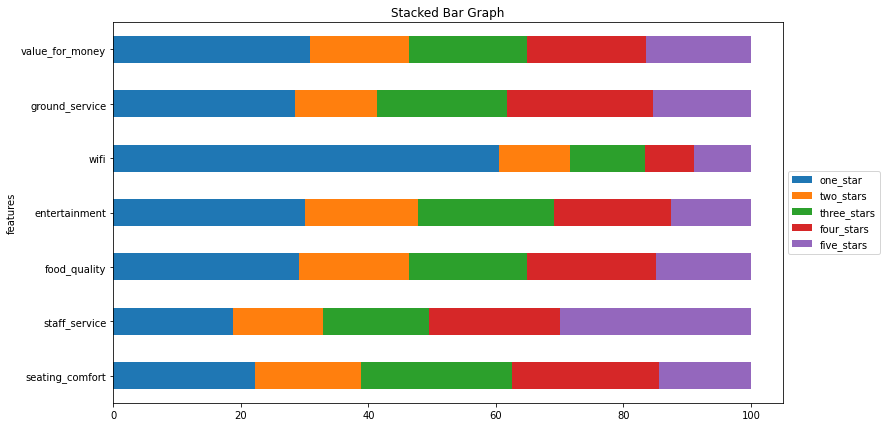

In [ ]:
# plot a Stacked Bar Chart using matplotlib

ax = df_viz.plot(
    x = 'features',
    kind = 'barh',
    stacked = True,
    title = 'Stacked Bar Graph',
    mark_right = True,
    legend = 'reverse',
    figsize = ( 12, 7))

# Put a legend to the right of the current axis
ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))

plt.show()


### fourth findings

the  wifi serves has more than 50% 1 star rating => immidate upgrate

BA doing well with the staff services

## Analysing the aircraft feature

In [ ]:
data.head(2)

,status,aircraft,travel_type,travel_class,route,date,seating_comfort,staff_service,food_quality,entertainment,wifi,ground_service,value_for_money,recommended,overall_rating,review,rating,month,year
0,✅ Trip Verified,Boeing 777-200,Family Leisure,Economy Class,Atlanta to London,2023-01-01,1,1,1,3,<NA>,1,2,no,4,Flew ATL to LHR 8th Jan 2023. Was unlucky en...,bad,1,2023
1,Not Verified,A380,Family Leisure,Economy Class,London to Chicago,2022-12-01,3,2,3,4,<NA>,3,2,no,5,Great thing about British Airways A380 is th...,average,12,2022


In [ ]:
data_aircraft = data[['aircraft','overall_rating']].copy()

In [ ]:
data_aircraft.head(3)

,aircraft,overall_rating
0,Boeing 777-200,4
1,A380,5
2,NaN,1


In [ ]:
data_aircraft.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3424 entries, 0 to 3429
Data columns (total 2 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   aircraft        1807 non-null   object
 1   overall_rating  3424 non-null   Int64 
dtypes: Int64(1), object(1)
memory usage: 212.6+ KB


In [ ]:
data_aircraft.dropna(inplace=True)

In [ ]:
data_aircraft.aircraft.value_counts()

A320                     330
Boeing 777               261
Boeing 747-400           182
A380                     157
Boeing 777-200           120
                        ... 
Boeing 747-400 / A319      1
A319 / Boeing 787-9        1
Airbus A32                 1
A320 / Boeing 787-9        1
Airbus 319                 1
Name: aircraft, Length: 191, dtype: int64

In [ ]:
data_aircraft_filter = data_aircraft.aircraft.value_counts().rename_axis('aircraft').reset_index(name='counts')

In [ ]:
data_aircraft_filter.head()

,aircraft,counts
0,A320,330
1,Boeing 777,261
2,Boeing 747-400,182
3,A380,157
4,Boeing 777-200,120


In [ ]:
# we keep aircrafts with more than 50 reviews
rslt_df = data_aircraft_filter[data_aircraft_filter['counts'] > 50] 

In [ ]:
aircraft_list = rslt_df.aircraft.tolist()

In [ ]:
aircraft_list

['A320',
 'Boeing 777',
 'Boeing 747-400',
 'A380',
 'Boeing 777-200',
 'A319',
 'Boeing 747',
 'A321',
 'Boeing 787']

In [ ]:
data_aircraft = data_aircraft[data_aircraft['aircraft'].isin(aircraft_list)]

In [ ]:
data_aircraft.head()

,aircraft,overall_rating
0,Boeing 777-200,4
1,A380,5
5,A321,8
6,A380,6
7,Boeing 777,4


In [ ]:
data_aircraft.groupby('aircraft').mean()

,overall_rating
aircraft,
A319,5.261682
A320,4.966667
A321,5.068493
A380,5.66242
Boeing 747,4.352941
Boeing 747-400,5.087912
Boeing 777,4.636015
Boeing 777-200,5.341667
Boeing 787,5.933333


### fifth fingings

the average of all the reviews is between 4 and 6

Boeing 787: best reviewed aircraft

Boeing 747: worst reviewed airpcraft



## Sentiment analysis

In [ ]:
nltk.download('vader_lexicon')

[nltk_data] Downloading package vader_lexicon to /root/nltk_data...


True

In [ ]:
# Creating a new column called 'sentiment' that contains the sentiment analysis scores of each review using nltk
from nltk.sentiment import vader
import nltk
import requests
from collections import Counter

In [ ]:
# an instance of SentimentIntensityAnalyzer
sentiment_analyzer = vader.SentimentIntensityAnalyzer()

# a new column named 'sentiment'
data['sentiment'] = data['review'].apply(
    lambda review: sentiment_analyzer.polarity_scores(review)['compound']
    )

In [ ]:
data.head(3)

,status,aircraft,travel_type,travel_class,route,date,seating_comfort,staff_service,food_quality,entertainment,wifi,ground_service,value_for_money,recommended,overall_rating,review,rating,month,year,sentiment
0,✅ Trip Verified,Boeing 777-200,Family Leisure,Economy Class,Atlanta to London,2023-01-01,1,1,1,3,<NA>,1,2,no,4,Flew ATL to LHR 8th Jan 2023. Was unlucky en...,bad,1,2023,-0.9845
1,Not Verified,A380,Family Leisure,Economy Class,London to Chicago,2022-12-01,3,2,3,4,<NA>,3,2,no,5,Great thing about British Airways A380 is th...,average,12,2022,0.9382
2,Not Verified,NaN,Family Leisure,Economy Class,Istanbul to Vancouver via Heathrow,2023-01-01,1,5,1,1,<NA>,1,1,no,1,"The staff are friendly. The plane was cold, w...",bad,1,2023,0.3118


In [ ]:
# Creating another new column called 'sentiment_type' that contains the type of sentiment of each review using nltk

data['sentiment_type'] = data['sentiment'].apply(
    lambda score: 'positive' if score > 0 else ('negative' if score < 0 else 'neutral')
    )

In [ ]:
data.head(3)

,status,aircraft,travel_type,travel_class,route,date,seating_comfort,staff_service,food_quality,entertainment,...,ground_service,value_for_money,recommended,overall_rating,review,rating,month,year,sentiment,sentiment_type
0,✅ Trip Verified,Boeing 777-200,Family Leisure,Economy Class,Atlanta to London,2023-01-01,1,1,1,3,...,1,2,no,4,Flew ATL to LHR 8th Jan 2023. Was unlucky en...,bad,1,2023,-0.9845,negative
1,Not Verified,A380,Family Leisure,Economy Class,London to Chicago,2022-12-01,3,2,3,4,...,3,2,no,5,Great thing about British Airways A380 is th...,average,12,2022,0.9382,positive
2,Not Verified,NaN,Family Leisure,Economy Class,Istanbul to Vancouver via Heathrow,2023-01-01,1,5,1,1,...,1,1,no,1,"The staff are friendly. The plane was cold, w...",bad,1,2023,0.3118,positive


In [ ]:
# calculate the percentage of each type of sentiment score
sentiment_type_percentages = data['sentiment_type'].value_counts(normalize=True)*100

In [ ]:
sentiment_type_percentages_df = sentiment_type_percentages.rename_axis('sentiment_type').reset_index(name='counts')
sentiment_type_percentages_df

,sentiment_type,counts
0,positive,59.929907
1,negative,39.807243
2,neutral,0.262850


In [ ]:
import plotly.express as px

fig = px.pie(sentiment_type_percentages_df, values='counts', names='sentiment_type')
fig.show()

In [ ]:
import plotly.graph_objects as go
colors = ['gold', 'mediumturquoise', 'lightgreen']

fig = go.Figure(data=[go.Pie(labels=['Positive','Negative','Neutral'],
                             values=[59.95,39.80,0.26])])
fig.update_traces(hoverinfo='label+percent', textinfo='value', textfont_size=20,
                  marker=dict(colors=colors, line=dict(color='#000000', width=2)))
fig.show()